# Adult DataSet
year 1996

## Let's predict if the person can make more than 50.000 dollars a year or not

### Import of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

### Import files with data

In [2]:
ds = pd.read_csv('adult.csv')

### Inspect the dataset

In [3]:
ds.shape

(32561, 15)

In [4]:
ds.head()

,Age,Workclass,fnlwgt,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Rename unknown rows in some columns

In [5]:
ds['Workclass'] = ds['Workclass'].replace({r' ?':' Other'})
ds['Occupation'] = ds['Occupation'].replace({r' ?':' Other'})

In [6]:
ds.describe()

,Age,fnlwgt,Ed-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Meaning of some names of the columns:</b><br>
<b>fnlwgt</b> - finall weight. People with similar demographic characteristics<br>
<b>Ed-num</b> - number of aducations of the person

## Visualization of data

### Male to Female ratio in dataset

Text(0.5, 0.98, 'Male to Female ratio')

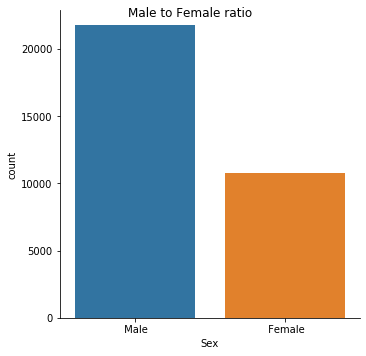

In [7]:
ax = sns.catplot(x="Sex", kind="count", data=ds)
ax.fig.suptitle('Male to Female ratio')

### Number of workers for each workclass

Text(0.5, 1.0, 'Number of workclasses')

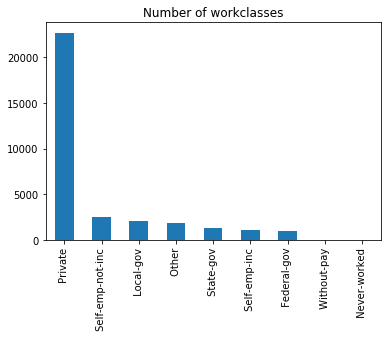

In [8]:
ds['Workclass'].value_counts().plot.bar()
plt.title('Number of workclasses')

### How many hours are people working for each age

Text(0.5, 1.0, 'Who is working more hours by age')

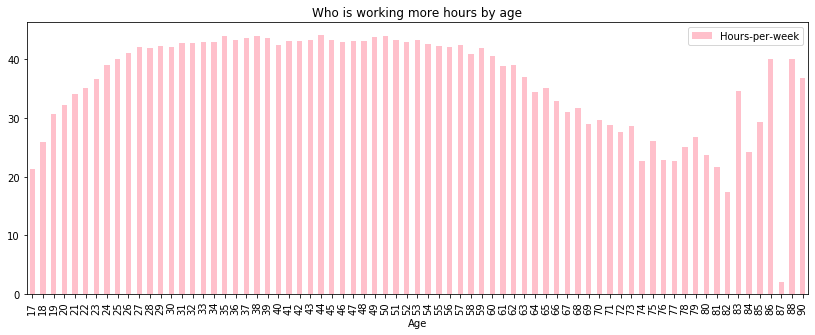

In [9]:
sex = ds[["Hours-per-week", "Age"]].groupby(["Age"]).agg("mean")
sex.plot.bar(figsize = (14,5), color = 'pink')
plt.title('Who is working more hours by age')

### Age distribution

Here we can can see that the distribution is a bit right skewed and it means that there are less ages of older people then younger in the dataset 

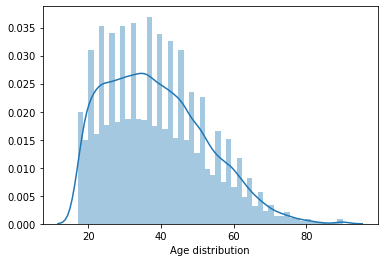

In [10]:
sns.distplot(ds['Age'], bins=50, axlabel='Age distribution')

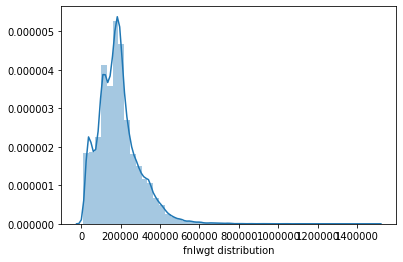

In [11]:
sns.distplot(ds['fnlwgt'], bins=50, axlabel='fnlwgt distribution')

### Working hours per week and number of educations for different workclasses

Here we can see that the poeple who are studying more are also working more.<br>
And the most popular profession is the private area.

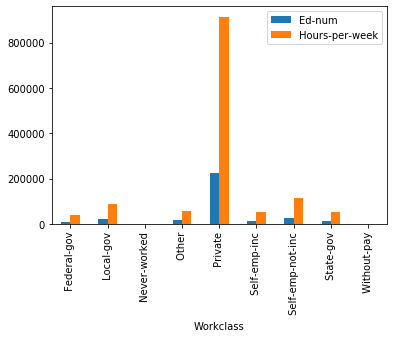

In [12]:
workers = ds[["Ed-num", "Hours-per-week", "Workclass"]].groupby(["Workclass"]).agg("sum")
workers.plot.bar()

### Prepare data for to create plot ''Workclasses by gender''

In [13]:
m_workers_all = ds[ds['Sex'] == ds.Sex.unique()[0]].groupby(["Workclass"]).count().reset_index()
m_workers = m_workers_all[['Workclass', 'Age']]
m_workers = m_workers.rename(columns = {'Age':'Sum'})
m_workers

,Workclass,Sum
0,Federal-gov,645
1,Local-gov,1258
2,Never-worked,5
3,Other,997
4,Private,14944
5,Self-emp-inc,981
6,Self-emp-not-inc,2142
7,State-gov,809
8,Without-pay,9


In [14]:
w_workers_all = ds[ds['Sex'] == ds.Sex.unique()[1]].groupby(["Workclass"]).count().reset_index()
w_workers = w_workers_all[['Workclass', 'Age']]
w_workers = w_workers.rename(columns = {'Age':'Sum'})
w_workers

,Workclass,Sum
0,Federal-gov,315
1,Local-gov,835
2,Never-worked,2
3,Other,839
4,Private,7752
5,Self-emp-inc,135
6,Self-emp-not-inc,399
7,State-gov,489
8,Without-pay,5


In [15]:
workclass = w_workers['Workclass'].unique().tolist()
gender = ds['Sex'].unique().tolist()
m_workers = m_workers['Sum'].unique().tolist()
w_workers = w_workers['Sum'].unique().tolist()
workclass

[' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Other',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay']

Testing one of the plots (most popular professions for women)

<BarContainer object of 9 artists>

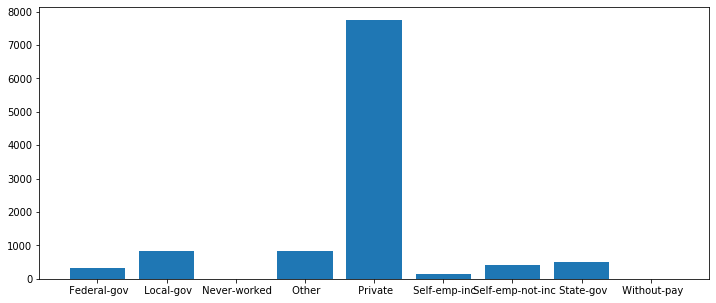

In [16]:
plt.figure(figsize=(12,5))
plt.bar(workclass, w_workers)

And final plot: Workclasses by Gender

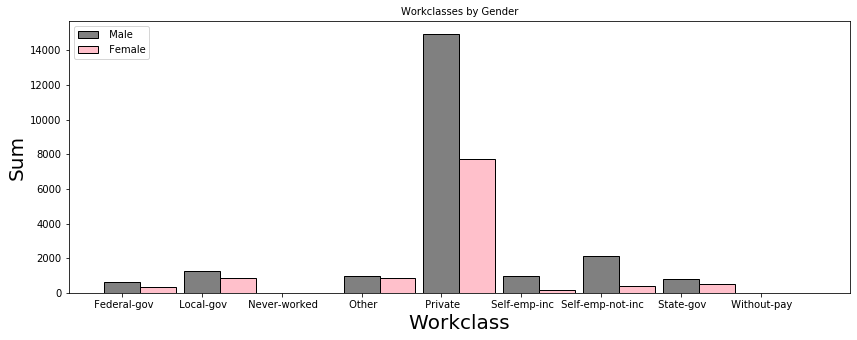

In [17]:
pos = np.arange(len(workclass))
bar_width = 0.45
plt.figure(figsize=(14,5))
plt.bar(pos, m_workers, bar_width, color = 'grey', edgecolor = 'black')
plt.bar(pos + bar_width, w_workers, bar_width, color = 'pink', edgecolor = 'black')
plt.xticks(pos, workclass)
plt.xlabel('Workclass', fontsize = 20)
plt.ylabel('Sum', fontsize = 20)
plt.title('Workclasses by Gender',fontsize = 10)
plt.legend(gender,loc = 2)

plt.show()

### Check the total amount of different marital statuses

Text(0.5, 1.0, 'Number of different maritals')

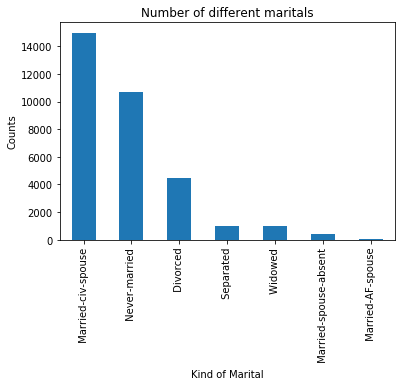

In [18]:
ds['Marital'].value_counts().plot.bar()
plt.xlabel('Kind of Marital')
plt.ylabel('Counts')
plt.title('Number of different maritals')

In [19]:
#ax = sns.catplot(x="Marital", kind="count", data=ds, aspect = 2)
#ax.fig.suptitle('Number of different maritals')

### As there is a huge part of private workers let's check the marital status only for them

We can see that now we have:<br>
 -5000 Married-civ-spouse<br>
 -2000 Never-married<br>
 -1000 Divorced<br>
But the main tendency of maritals does not change.

In [20]:
private = ds.loc[ds['Workclass'] == ' Private']

Text(0.5, 1.0, 'Number of different maritals for the private workers')

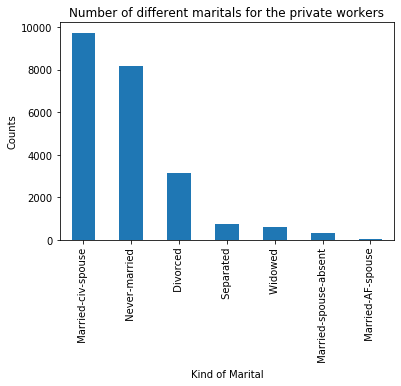

In [21]:
private['Marital'].value_counts().plot.bar()
plt.xlabel('Kind of Marital')
plt.ylabel('Counts')
plt.title('Number of different maritals for the private workers')

In [22]:
#ax = sns.catplot(x="Marital", kind="count", data=private, aspect = 2.5)
#ax.fig.suptitle('Number of different maritals for private workers')

Let's count the number of different occupations

In [23]:
occupation = ds.groupby(['Occupation']).count()#.reset_index()
occupation = occupation[['Age']]
occupation = occupation.rename(columns = {'Age':'Sum'}).sort_values(['Sum'], ascending = False)#.reset_index()
occupation

,Sum
Occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Other,1843
Transport-moving,1597


Text(0.5, 1.0, 'Number of different occupations')

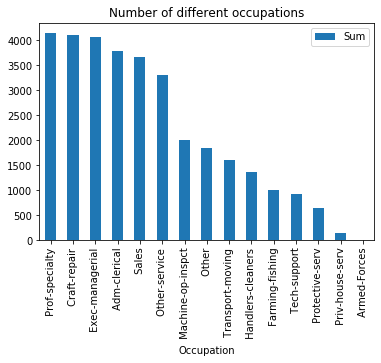

In [24]:
occupation.plot.bar()
plt.title('Number of different occupations')

In [25]:
occupation

,Sum
Occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Other,1843
Transport-moving,1597


In [26]:
'''plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=occupation,
    x='Sum'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Kind of professions by count')'''

"plt.figure(figsize=(10,5))\nchart = sns.countplot(\n    data=occupation,\n    x='Sum'\n)\nchart.set_xticklabels(chart.get_xticklabels(), rotation=90)\nplt.title('Kind of professions by count')"

Let's see how many races there are in dataset

Text(0.5, 1.0, 'Different races')

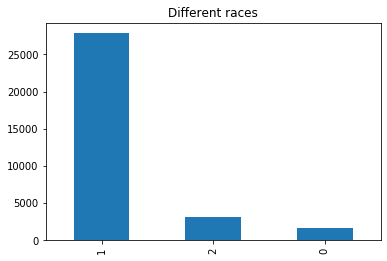

In [83]:
race = ds['Race'].value_counts()
race.plot.bar()
plt.title('Different races')

### Prepare data for to create a plot ''Marital status by Gender''

In [28]:
m_rel_all = ds[ds['Sex'] == ds.Sex.unique()[0]].groupby(["Marital"]).count().reset_index()
m_rel = m_rel_all[['Marital', 'Age']]
m_rel = m_rel.drop(1)
m_rel = m_rel.drop(3)
m_rel = m_rel.rename(columns = {'Age':'Sum'})
m_rel

,Marital,Sum
0,Divorced,1771
2,Married-civ-spouse,13319
4,Never-married,5916
5,Separated,394
6,Widowed,168


In [29]:
w_rel_all = ds[ds['Sex'] == ds.Sex.unique()[1]].groupby(["Marital"]).count().reset_index()
w_rel = w_rel_all[['Marital', 'Age']]
w_rel = w_rel.drop(1)
w_rel = w_rel.drop(3)
w_rel = w_rel.rename(columns = {'Age':'Sum'})
w_rel

,Marital,Sum
0,Divorced,2672
2,Married-civ-spouse,1657
4,Never-married,4767
5,Separated,631
6,Widowed,825


In [30]:
marital = w_rel['Marital'].unique().tolist()
gender = ds['Sex'].unique().tolist()
m_rel = m_rel['Sum'].unique().tolist()
w_rel = w_rel['Sum'].unique().tolist()
marital

[' Divorced',
 ' Married-civ-spouse',
 ' Never-married',
 ' Separated',
 ' Widowed']

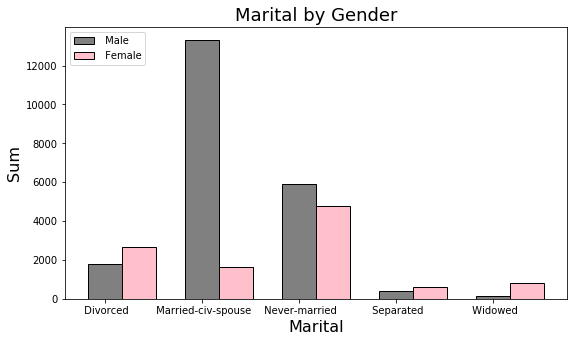

In [31]:
pos = np.arange(len(marital))
bar_width = 0.35
plt.figure(figsize=(9,5))
plt.bar(pos, m_rel, bar_width, color = 'grey', edgecolor = 'black')
plt.bar(pos + bar_width, w_rel, bar_width, color = 'pink', edgecolor = 'black')
plt.xticks(pos, marital)
plt.xlabel('Marital', fontsize = 16)
plt.ylabel('Sum', fontsize = 16)
plt.title('Marital status by Gender',fontsize = 18)
plt.legend(gender,loc = 2)

plt.show()

What is the range of gaining capital?

Text(0.5, 1.0, 'Gain of capital')

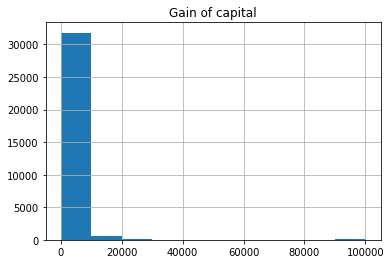

In [32]:
gain = ds.sort_values(by = ['Capital-gain'], ascending = [False])
gain['Capital-gain'].hist()
plt.title('Gain of capital')

And also loosing..

Text(0.5, 1.0, 'Loss of capital')

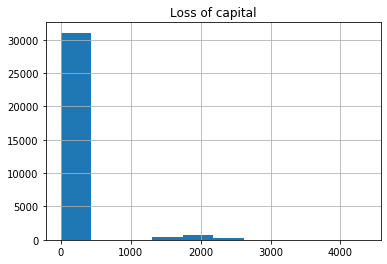

In [33]:
loss = ds.sort_values(by = ['Capital-loss'], ascending = [False])
loss['Capital-loss'].hist()
plt.title('Loss of capital')

Haw many hours per week the most of people are working?

Text(0.5, 1.0, 'Hours per week')

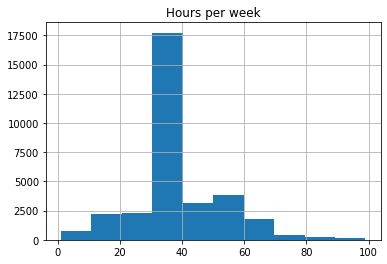

In [34]:
hour = ds.sort_values(by = ['Hours-per-week'], ascending = [False])
hour['Hours-per-week'].hist()
plt.title('Hours per week')

In [35]:
ds.head(2)

,Age,Workclass,fnlwgt,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [36]:
#ds['fnlwgt'].value_counts().plot.bar()
#plt.title('Number of workclasses')

## Preparing data for calculating accuracy of prediction

### Look for NaNs
And there is no NaNs

In [37]:
# No NaN
# ds.isna().sum()

### Doing information more general

In [38]:
ds.head(0)

,Age,Workclass,fnlwgt,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target


In [39]:
ds = ds.loc[ds['Workclass'] != 'Other']

In [40]:
# Dropping continuous variable fnlwgt
ds = ds.drop(columns = ['fnlwgt'])

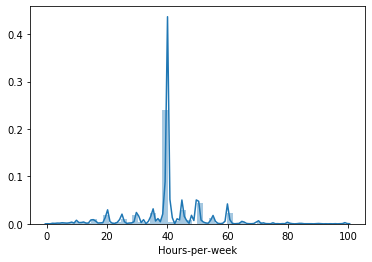

In [41]:
sns.distplot(ds['Hours-per-week'])

In [42]:
#ds_age0 = ds.loc[ds['Age'] < 28]
#ds_age1 = ds.append(ds.loc[(ds['Age'] >= 28) & (ds['Age'] < 50)])
#ds_age2 = ds.append(ds.loc[(ds['Age'] >= 50) & (ds['Age'] < 70)])
#ds_age3 = ds.append(ds.loc[ds['Age'] >= 70])

In [43]:
#ds_age0['Age'] = 0
#ds_age1['Age'] = 1
#ds_age2['Age'] = 2
#ds_age3['Age'] = 3
#ds_age = ds_age0.append(ds_age1)
#ds_age = ds_age.append(ds_age2)
#ds_age = ds_age.append(ds_age3)

In [44]:
#ds_age.shape

### Inspect data types

In [45]:
ds.dtypes

Age                int64
Workclass         object
Education         object
Ed-num             int64
Marital           object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native-country    object
Target            object
dtype: object

### Transform object data to numeric analog

In [46]:
ds['Target'] = ds['Target'].replace({r' <=50K':0, r' >50K':1})
ds['Sex'] = ds['Sex'].replace({r' Male':1, r' Female':0})
ds['Race'] = ds['Race'].replace({r' White':1, r' Other':0, r' Black':2, r' Asian-Pac-Islander':0, 
                                 r' Amer-Indian-Eskimo':0})
ds['Relationship'] = ds['Relationship'].replace({r' Not-in-family':1, r' Husband':0, r' Wife':0, r' Own-child':1,
                                         r' Unmarried':1, r' Other-relative':1}) 
ds['Marital'] = ds['Marital'].replace({r' Never-married':1, r' Married-civ-spouse':0, r' Divorced':2, 
                                       r' Married-spouse-absent':0, r' Separated':2, r' Married-AF-spouse':0, 
                                       r' Widowed':2})
ds['Education'] = ds['Education'].replace({r' Bachelors':0, r' HS-grad':2, r' 11th':1, 
                                       r' Masters':0, r' 9th':1, r' Some-college':2, 
                                       r' Assoc-acdm':6, r' Assoc-voc':7, r' 7th-8th':1, r' Doctorate':0,
                                       r' Prof-school':3, r' 5th-6th':1, r' 10th':2, r' 1st-4th':1,
                                       r' Preschool':1, r' 12th':2})
ds['Workclass'] = ds['Workclass'].replace({r' State-gov':0, r' Self-emp-not-inc':1, r' Private':2, 
                                       r' Federal-gov':0, r' Local-gov':0, r' Other':3, 
                                       r' Self-emp-inc':4, r' Without-pay':3, r' Never-worked':3})
ds['Occupation'] = ds['Occupation'].replace({r' Adm-clerical':0, r' Exec-managerial':1, r' Handlers-cleaners':2, 
                                       r' Prof-specialty':3, r' Other-service':4, r' Sales':5, 
                                       r' Craft-repair':6, r' Transport-moving':7, r' Farming-fishing':8,
                                       r' Machine-op-inspct':9, r' Tech-support':10, r' Other':11,
                                       r' Protective-serv':12, r' Armed-Forces':13, r' Priv-house-serv':14})
ds['Native-country'] = ds['Native-country'].replace({r' United-States':0, r' Cuba':1, r' Jamaica':1, r' India':2, 
                                                    r' ?':9, r' Mexico':3, r' South':4, r' Puerto-Rico':1, 
                                                    r' Honduras':5, r' England':6, r' Canada':7, r' Germany':8, 
                                                    r' Iran':9, r' Philippines':13, r' Italy':8, r' Poland':8, 
                                                    r' Columbia':4, r' Cambodia':10, r' Thailand':10, r' Ecuador':4, 
                                                    r' Laos':10, r' Taiwan':10, r' Haiti':1, r' Portugal':8, 
                                                    r' Dominican-Republic':1, r' El-Salvador':5, 
                                                     r' France':8, r' Guatemala':5, 
                                                    r' China':11, r' Japan':12, r' Yugoslavia':9, r' Peru':4, 
                                                    r' Outlying-US(Guam-USVI-etc)':9, r' Scotland':6, 
                                                     r' Trinadad&Tobago':4, r' Greece':8, 
                                                    r' Nicaragua':5, r' Vietnam':10, r' Hong':11, r' Ireland':6, 
                                                    r' Hungary':8, r' Holand-Netherlands':8 })
ds['Age'] = ds['Age'].replace({17:0,18:0,19:0,20:0,21:0,22:0,23:0,24:0,25:0,26:0,27:0,28:0,
                              29:1,30:1,31:1,32:1,33:1,34:1,35:1,36:1,37:1,38:1,39:1,40:1,41:1,
                               42:1,43:1,44:1,45:1,46:1,47:1,48:1,49:1,50:1,
                               51:1,52:1,53:1,54:1,55:1,56:1,57:1,58:1,59:1,
                               60:2,61:2,62:2,63:2,64:2,65:2,66:2,67:2,
                              68:2,69:2,70:3,71:3,72:3,73:3,74:3,75:3,76:3,77:3,78:3,79:3,
                               80:3,81:3,82:3,83:3,84:3, 85:3,86:3,87:3,88:3,89:3,
                               90:3})

In [47]:
ds['Age'].dtypes

dtype('int64')

In [48]:
ds['Age'].unique().tolist() #42

[1, 0, 3, 2]

### Now our dataset is having new look

In [49]:
ds.head()

,Age,Workclass,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,1,0,0,13,1,0,1,1,1,2174,0,40,0,0
1,1,1,0,13,0,1,0,1,1,0,0,13,0,0
2,1,2,2,9,2,2,1,1,1,0,0,40,0,0
3,1,2,1,7,0,2,0,2,1,0,0,40,0,0
4,0,2,0,13,0,3,0,2,0,0,0,40,1,0


In [50]:
ds.dtypes

Age               int64
Workclass         int64
Education         int64
Ed-num            int64
Marital           int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital-gain      int64
Capital-loss      int64
Hours-per-week    int64
Native-country    int64
Target            int64
dtype: object

### Create correlation matrix (with some correlations more then 40%)

In [52]:
corr = ds.corr()

corr_mask = abs(ds.corr()) > 0.4
matrix = corr[corr_mask]
matrix

,Age,Workclass,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ed-num,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital,NaN,NaN,NaN,NaN,1.000000,NaN,0.854946,NaN,-0.440807,NaN,NaN,NaN,NaN,NaN
Occupation,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,NaN,NaN,NaN,NaN,0.854946,NaN,1.000000,NaN,-0.434780,NaN,NaN,NaN,NaN,-0.448496
Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,-0.440807,NaN,-0.434780,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


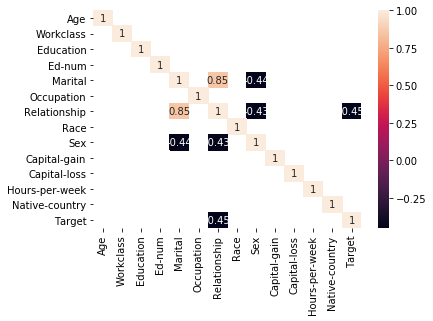

In [53]:
ax = sns.heatmap(matrix, annot = True)

## Praparing for to train and to test the models with different methodics of prediction

In [55]:
y = ds['Target']
X = ds.drop(['Target'], axis = 1)

In [56]:
from sklearn.model_selection import train_test_split
# Divide train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

### 1. Count logistic regression accuracy

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

/home/alona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Test Accuracy 83.94%


In [58]:
from sklearn.metrics import confusion_matrix

### 1a. Confusion matrix for logistic regression

In [59]:
y_pred = lr.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[4567,  327],
       [ 719,  900]])

### 2. Count dicision tree accuracy

In [60]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 83.45%


### 2a. Confusion matrix for dicision tree

In [61]:
y_pred = dtc.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[4452,  442],
       [ 636,  983]])

### 3. SVC accuracy (counts very slow, but its not higher)

In [63]:
#from sklearn.svm import SVC
#svm = SVC()
#svm.fit(X_train, y_train)

#acc = svm.score(X_test,y_test)*100
#print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

### 3a. Confusion matrix for SVC

In [64]:
#y_pred = svm.predict(X_test)
#conf = confusion_matrix(y_test, y_pred)
#conf

### 4. K-Neighbourhood classifier accuracy

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"2 neighbors KNN Score: {round(acc,2)}%")

2 neighbors KNN Score: 83.45%


### 4a. Confusion matrix for KNN

In [66]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[4664,  230],
       [ 848,  771]])

## Let's get same weights of targeting of people (because there are much less people with our target = 1)

In [67]:
ds.head()

,Age,Workclass,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,1,0,0,13,1,0,1,1,1,2174,0,40,0,0
1,1,1,0,13,0,1,0,1,1,0,0,13,0,0
2,1,2,2,9,2,2,1,1,1,0,0,40,0,0
3,1,2,1,7,0,2,0,2,1,0,0,40,0,0
4,0,2,0,13,0,3,0,2,0,0,0,40,1,0


Here you can see the difference:

In [68]:
no_ds = ds.loc[ds['Target'] == 0]
len(no_ds)

24720

In [69]:
yes_ds = ds.loc[ds['Target'] == 1]
len(yes_ds)

7841

Taking just sample of 'no'-targets

In [70]:
no_ds = no_ds.sample(7841)

In [71]:
no_ds.shape

(7841, 14)

In [72]:
no_ds1 = no_ds[:7841]
len(no_ds1)

7841

### Next step is to create equal dataset

In [73]:
equal_ds = yes_ds.append(no_ds)
equal_ds.head(2)

,Age,Workclass,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
7,1,1,2,9,0,1,0,1,1,0,0,45,0,1
8,1,2,0,14,1,3,1,1,0,14084,0,50,0,1


### Now we are going to make some improves to get higher occuracy prediction

In [75]:
yes_ds2 = yes_ds.loc[yes_ds['Age'] == 1]
#yes_ds2 = yes_ds2.loc[yes_ds['Sex'] == 1]
#yes_ds2 = yes_ds2.loc[yes_ds['Native-country'] == 0]
yes_ds2 = yes_ds2.loc[yes_ds['Workclass'] == 2]
#yes_ds2 = yes_ds2.loc[yes_ds['Relationship'] == 0]
yes_ds2 = yes_ds2.loc[yes_ds['Education'] == 0]
#yes_ds2 = yes_ds2.loc[yes_ds['Race'] == 1]
len(yes_ds2)

1921

In [76]:
no_ds2 = ds.loc[ds['Age'] == 1]
#no_ds2 = no_ds2.loc[ds['Sex'] == 1]
#no_ds2 = no_ds2.loc[no_ds2['Native-country'] == 0]
no_ds2 = no_ds2.loc[no_ds2['Workclass'] == 2]
#no_ds2 = no_ds2.loc[no_ds2['Relationship'] == 0]
o_ds2 = no_ds2.loc[no_ds2['Education'] == 0]
#no_ds2 = no_ds2.loc[no_ds2['Race'] == 1]
print(len(no_ds2))
no_ds2  = no_ds2.sample(1921)
print(len(no_ds2))

14392
1921


### Let's try to count again!

In [77]:
equal_ds = yes_ds2.append(no_ds2)
equal_ds.drop(columns = ['Native-country'], inplace = True)
equal_ds.head(2)

,Age,Workclass,Education,Ed-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Target
8,1,2,0,14,1,3,1,1,0,14084,0,50,1
9,1,2,0,13,0,1,0,1,1,5178,0,40,1


In [78]:
y = equal_ds['Target']
X = equal_ds.drop(['Target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

Decision Tree Test Accuracy 83.22%


In [79]:
y_pred = dtc.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[219,  71],
       [ 58, 421]])

In [80]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

Logistic Regression Test Accuracy 85.7%


/home/alona/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now we can see that our accuracy of prediction if the person can make more then 50.000$ a year or not get higher.
So some conclusion can be that to become reach you need: to be between 30-60 years old, you have to work in a private spot and you have to have a higher education. Those are the most valuable parameters for the prediction. Have a good day and become rich!